In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegressionCV,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import r2_score,f1_score,accuracy_score,recall_score,precision_score,mean_absolute_error,mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from statsmodels.api import OLS
from xgboost import XGBClassifier,XGBRegressor

In [2]:
first = pd.read_csv('train.csv')
first.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
second = pd.read_csv('test.csv')
second.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
third = pd.read_csv('sample_submission.csv')
third.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [5]:
second['SalePrice'] = third['SalePrice']
second.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [6]:
total = pd.concat([first,second],axis=0)
total.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [7]:
total.shape

(2919, 81)

In [8]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [9]:
total = total.select_dtypes(['float64','int64'])

In [10]:
total.fillna(total.mean(),inplace=True)

In [11]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   OverallQual    2919 non-null   int64  
 5   OverallCond    2919 non-null   int64  
 6   YearBuilt      2919 non-null   int64  
 7   YearRemodAdd   2919 non-null   int64  
 8   MasVnrArea     2919 non-null   float64
 9   BsmtFinSF1     2919 non-null   float64
 10  BsmtFinSF2     2919 non-null   float64
 11  BsmtUnfSF      2919 non-null   float64
 12  TotalBsmtSF    2919 non-null   float64
 13  1stFlrSF       2919 non-null   int64  
 14  2ndFlrSF       2919 non-null   int64  
 15  LowQualFinSF   2919 non-null   int64  
 16  GrLivArea      2919 non-null   int64  
 17  BsmtFullBath   2919 non-null   float64
 18  BsmtHalf

In [12]:
features = total.drop('SalePrice',axis=1)
price = total['SalePrice']

In [13]:
log_price = np.log(price)

In [14]:
scaller = StandardScaler()
nf = scaller.fit_transform(features)

In [15]:
X_train, X_test , y_train, y_test = train_test_split(nf,log_price,test_size=0.3,random_state=12)

In [16]:
simple = LinearRegression()
simple.fit(X_train,y_train)
predictions=simple.predict(X_test)
SCORE = r2_score(y_test,predictions)
MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
m1 = pd.DataFrame({'SCORE':SCORE,'MAE':MAE,'MSE':MSE,'RMSE':RMSE},index=['LinearModel'])
m1

,SCORE,MAE,MSE,RMSE
LinearModel,0.504794,0.158252,0.04408,0.209953


C:\Users\IsoorI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


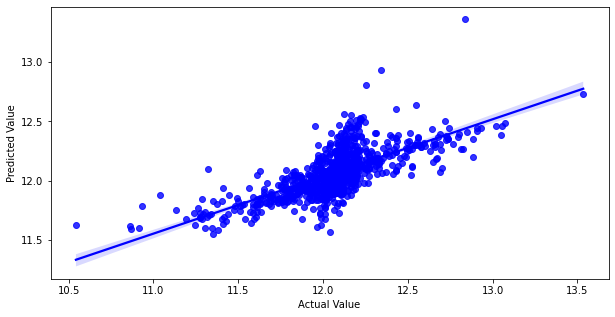

In [72]:
plt.figure(figsize=(10,5))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
sns.regplot(y_test.values,predictions,color='blue')
plt.show()

In [17]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
predictiont = tree.predict(X_test)
SCORE=r2_score(y_test,predictiont)
MAE = mean_absolute_error(y_test,predictiont)
MSE = mean_squared_error(y_test,predictiont)
RMSE = np.sqrt(MSE)
m2 = pd.DataFrame({'SCORE':SCORE,'MAE':MAE,'MSE':MSE,'RMSE':RMSE},index=['DecisionTrees'])
m2

,SCORE,MAE,MSE,RMSE
DecisionTrees,0.721243,0.089299,0.024813,0.157522


C:\Users\IsoorI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


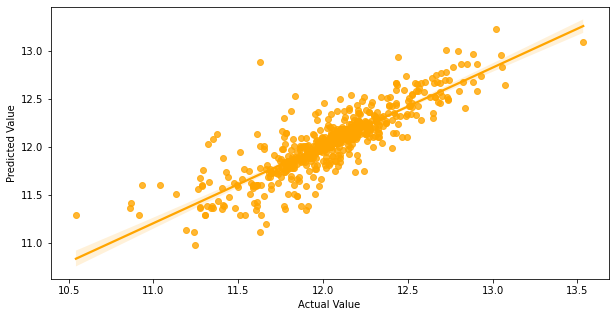

In [71]:
plt.figure(figsize=(10,5))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
sns.regplot(y_test.values,predictiont,color='orange')
plt.show()

In [18]:
forest = RandomForestRegressor()
forest.fit(X_train,y_train)
predictionf = forest.predict(X_test)
SCORE=r2_score(y_test,predictionf)
MAE = mean_absolute_error(y_test,predictionf)
MSE = mean_squared_error(y_test,predictionf)
RMSE = np.sqrt(MSE)
m3 = pd.DataFrame({'SCORE':SCORE,'MAE':MAE,'MSE':MSE,'RMSE':RMSE},index=['RandomForest'])
m3

,SCORE,MAE,MSE,RMSE
RandomForest,0.864698,0.058299,0.012044,0.109744


C:\Users\IsoorI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


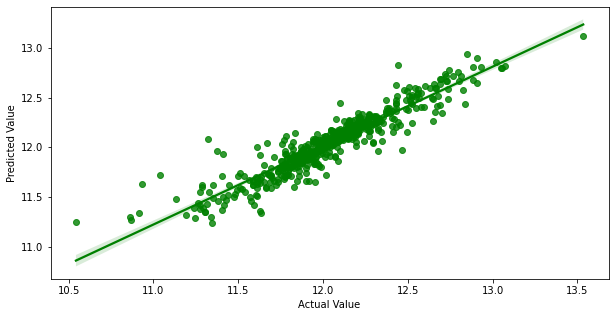

In [70]:
plt.figure(figsize=(10,5))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
sns.regplot(y_test.values,predictionf,color='green')
plt.show()

In [26]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
predictionx = xgb.predict(X_test)
SCORE=r2_score(y_test,predictionx)
MAE = mean_absolute_error(y_test,predictionx)
MSE = mean_squared_error(y_test,predictionx)
RMSE = np.sqrt(MSE)
m4 = pd.DataFrame({'SCORE':SCORE,'MAE':MAE,'MSE':MSE,'RMSE':RMSE},index=['XGBRegressor'])
m4

,SCORE,MAE,MSE,RMSE
XGBRegressor,0.864735,0.062955,0.01204,0.109729


C:\Users\IsoorI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


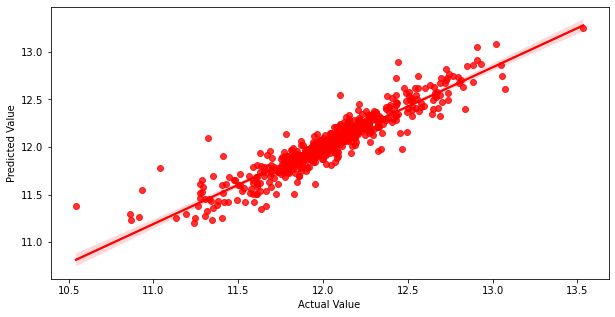

In [69]:
plt.figure(figsize=(10,5))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
sns.regplot(y_test.values,predictionx,color='red')
plt.show()

In [30]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=2000,num=20)]
max_depth = [int(x) for x in np.linspace(start=10,stop=100,num=10)]
max_depth.append(None)
max_features = ['auto','sqrt']
bootstrap = [False,True]
min_samples_leaf = [1,2,5]
min_samples_split = [2,5,10]
random_grid={
    'n_estimators' : n_estimators,
    'max_depth': max_depth,
    'max_features' : max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features' : max_features,
    'bootstrap' : bootstrap
}

Forest_model_tunned = RandomForestRegressor()
grid_forest = RandomizedSearchCV(estimator=Forest_model_tunned, param_distributions=random_grid, verbose=2 , cv=3 , n_iter= 100,n_jobs=-1)
grid_forest.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [False, True],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
 

In [31]:
predictionfh = grid_forest.best_estimator_.predict(X_test)
SCORE=r2_score(y_test,predictionfh)
MAE = mean_absolute_error(y_test,predictionfh)
MSE = mean_squared_error(y_test,predictionfh)
RMSE = np.sqrt(MSE)
m5 = pd.DataFrame({'SCORE':SCORE,'MAE':MAE,'MSE':MSE,'RMSE':RMSE},index=['RandomForest_Tunned'])
m5

,SCORE,MAE,MSE,RMSE
RandomForest_Tunned,0.866487,0.057957,0.011884,0.109016


C:\Users\IsoorI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


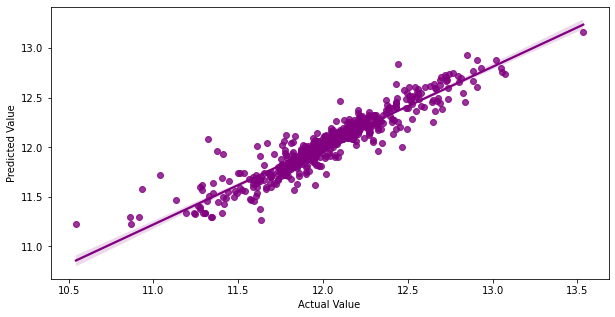

In [68]:
plt.figure(figsize=(10,5))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
sns.regplot(y_test.values,predictionfh,color='purple')
plt.show()

In [28]:
max_depthX = [int(x) for x in np.linspace(start=2,stop=20,num=10)]
learning_rate = [float(x) for x in np.linspace(start=0.01,stop=0.3,num=10)]
n_estimatorsX = [int(x) for x in np.linspace(start=100,stop=1000,num=20)]
params = { 'max_depth': max_depthX,
           'learning_rate': learning_rate,
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': n_estimatorsX
}



xgb_tunned = XGBRegressor()
grid_xgb = RandomizedSearchCV(estimator=xgb_tunned, param_distributions=params,verbose=2, n_iter=100,cv=3,n_jobs=-1)
grid_xgb.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                                          0.042222222222222223,
                           

In [29]:
predictionxh = grid_xgb.best_estimator_.predict(X_test)
SCORE=r2_score(y_test,predictionxh)
MAE = mean_absolute_error(y_test,predictionxh)
MSE = mean_squared_error(y_test,predictionxh)
RMSE = np.sqrt(MSE)
m6 = pd.DataFrame({'SCORE':SCORE,'MAE':MAE,'MSE':MSE,'RMSE':RMSE},index=['XGBRegressor_Tunned'])
m6

,SCORE,MAE,MSE,RMSE
XGBRegressor_Tunned,0.872019,0.059431,0.011392,0.106734


C:\Users\IsoorI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


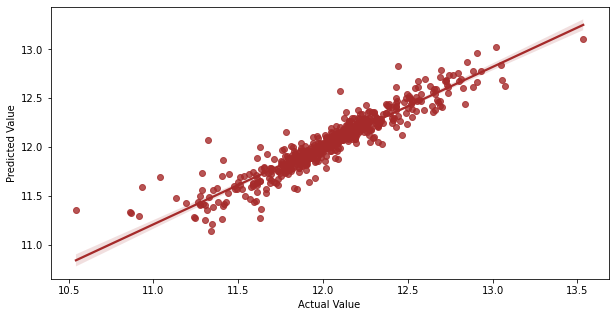

In [67]:
plt.figure(figsize=(10,5))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
sns.regplot(y_test.values,predictionxh,color='brown')
plt.show()

In [35]:
result = pd.concat([m1,m2,m3,m4,m5,m6],axis=0)
result.sort_values(by="SCORE",ascending = False)

,SCORE,MAE,MSE,RMSE
XGBRegressor_Tunned,0.872019,0.059431,0.011392,0.106734
RandomForest_Tunned,0.866487,0.057957,0.011884,0.109016
XGBRegressor,0.864735,0.062955,0.012040,0.109729
RandomForest,0.864698,0.058299,0.012044,0.109744
DecisionTrees,0.721243,0.089299,0.024813,0.157522
LinearModel,0.504794,0.158252,0.044080,0.209953


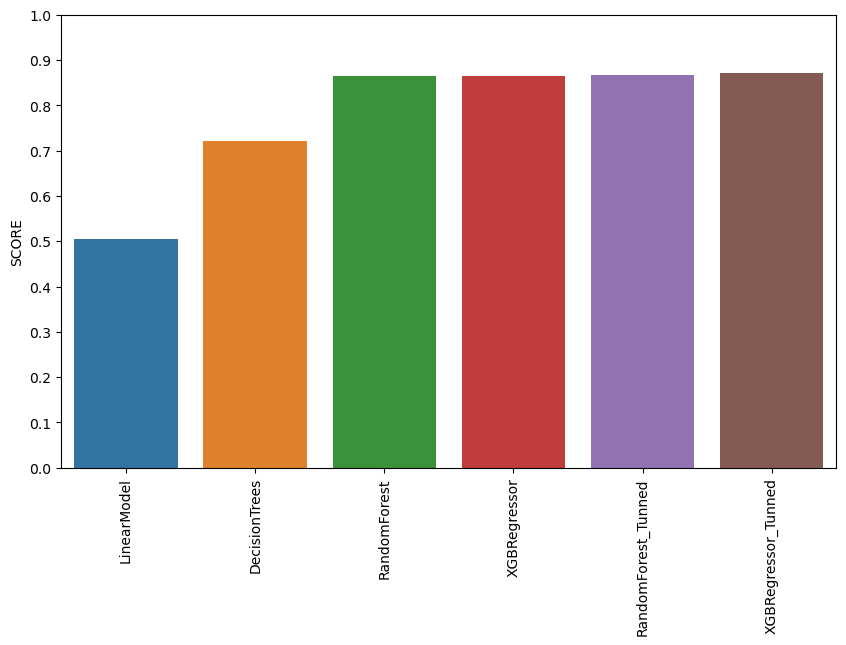

In [44]:
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(data=result,x=result.index,y='SCORE',)
plt.xticks(rotation='vertical')
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim(0,1)
plt.show()